# Proyecto 1

## Importacion de librerias, descarga de stopwords y funcion para tokenizar

In [1]:
import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

## Importacion de datos de entrenamiento

In [4]:
df = pd.read_csv('./data/reviews_train_val.csv')

In [5]:
df.shape

(314562, 2)

In [6]:
df.head()

,text,stars
0,Tried out the Sushi Bar for the first time las...,4
1,It is a PA store which is a problem for good w...,1
2,Great cigar shop. Good selection with a very h...,4
3,Had a BLAST! It's a little disorganized in the...,5
4,"Why does this nail salon still exist. Welp, be...",1


In [7]:
df['stars'].value_counts()

5    145748
4     64891
1     48453
3     30928
2     24542
Name: stars, dtype: int64

## Importacion de datos de prueba

In [8]:
df_test = pd.read_csv('./data/reviews_test_no_labels.csv')

In [9]:
df_test.shape

(34952, 1)

In [10]:
df_test.head()

,text
0,Came here with friends who live local. Enjoyed...
1,"My window was smashed out in December of 2018,..."
2,This is no In & Out burger. We finally drove t...
3,Just no on this company. Just don't do it.\nI ...
4,DC (During COVID) this place one of the places...


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['stars'], test_size = 0.2, stratify = df['stars'], random_state = 1)

In [73]:
X_train.shape

(251649,)

In [11]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [30]:
#X_bow = bow.fit_transform(df['text'].values)
X_bow = bow.fit_transform(X_train)

In [32]:
len(bow.vocabulary_)

151928

In [33]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [34]:
X_tfidf = tfidf.fit_transform(X_train)

In [35]:
len(tfidf.vocabulary_)

151928

In [102]:
bow_model = RandomForestClassifier(random_state = 2, max_depth = 100)

In [103]:
bow_model.fit(X_bow, y_train)

KeyboardInterrupt: 

<AxesSubplot:>

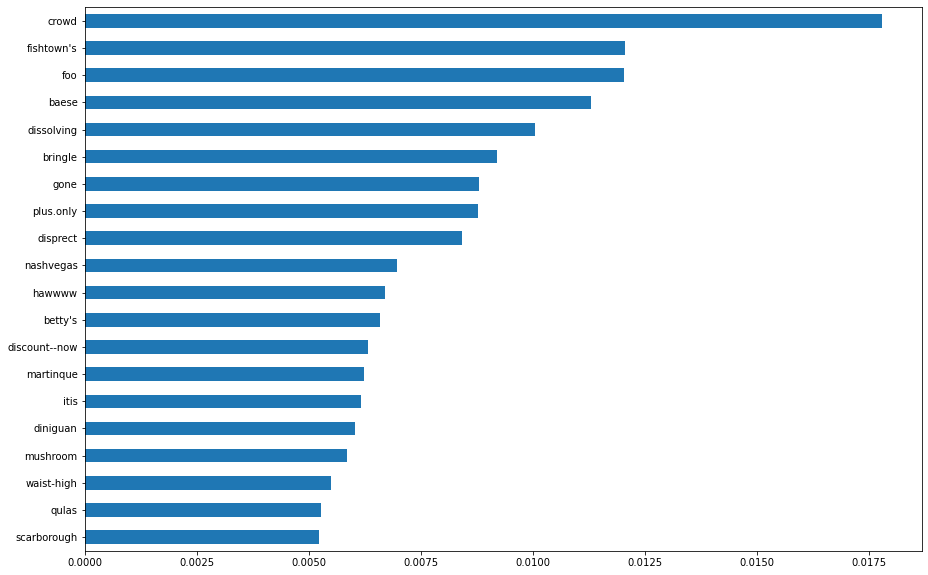

In [97]:
pd.Series(bow_model.feature_importances_, index = bow.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [98]:
bow_estimators = bow_model.estimators_
print('Number of trees:', len(bow_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 30.0


In [99]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

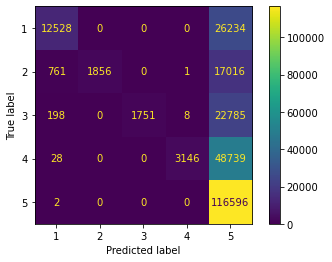

In [100]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

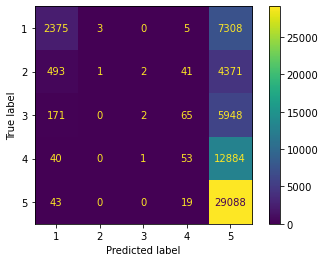

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)